In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [25]:
df = pd.read_csv('/content/drive/MyDrive//DATASETS/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


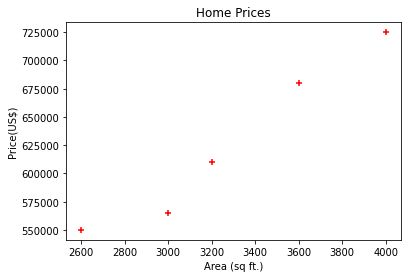

In [26]:
plt.scatter(df.area,df.price, color='red' , marker='+')
plt.xlabel('Area (sq ft.)')
plt.ylabel('Price(US$)')
plt.title('Home Prices')
plt.show()   #to ignore errors

In [27]:
new_df = df.drop('price', axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [28]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

# ***Linear Regression***

In [29]:
#Create an object for Linear Regression
reg = linear_model.LinearRegression() 
reg.fit(new_df,price)  #training our model with our csv file

LinearRegression()

In [30]:
#Predict price of a home with area = 3300 sqr ft
reg.predict([[3300]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [31]:
reg.coef_

array([135.78767123])

In [32]:
reg.intercept_

180616.43835616432

# ***Y = m * X + b (m is coefficient and b is intercept)***

In [33]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

# ***Predict price of a home with area = 5000 sqr ft***

In [34]:
reg.predict([[5000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([859554.79452055])

# ***Generate CSV file with list of home price predictions***

In [35]:
area_df = pd.read_csv("/content/drive/MyDrive/DATASETS/areas.csv")
area_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [36]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [37]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [38]:
#Rounding off the Prices values
area_df['prices'] = area_df['prices'].apply(np.floor)
area_df

,area,prices
0,1000,316404.0
1,1500,384297.0
2,2300,492928.0
3,3540,661304.0
4,4120,740061.0
5,4560,799808.0
6,5490,926090.0
7,3460,650441.0
8,4750,825607.0
9,2300,492928.0


In [40]:
area_df.to_csv("/content/drive/MyDrive/DATASETS/Homeprices_Chicago_prediction.csv", index = False)